<a href="https://colab.research.google.com/github/valentina-buoro/mpeg-decoding-the-dialogue/blob/main/notebooks/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings('ignore')

In [3]:
PARENT_PATH = '/content/drive/MyDrive/mpeg-decoding-the-dialogue/data/'

cytokine_profile_df = pd.read_csv(PARENT_PATH + "cytokine_profiles.csv")
mpeg_train_df = pd.read_csv(PARENT_PATH + "train_files.csv")
train_df = pd.read_csv(PARENT_PATH + "Train.csv")
train_subjects_df = pd.read_csv(PARENT_PATH + "Train_Subjects.csv")





In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [21]:
print(f"cytokine profile shape: {cytokine_profile_df.shape}")
cytokine_profile_df.head()

cytokine profile shape: (670, 73)


,SampleID,Plate,IL17F,FASL,TGFA,MIP1A,SDF1A,IL27,LIF,IL1B,IL2,IL4,IL5,IP10,IL6,IL7,IL8,IL10,IFNB,EOTAXIN,IL12P70,IL13,IL17A,IL31,IL1RA,SCF,RANTES,IFNG,GMCSF,TNFA,HGF,MIP1B,IFNA,TGFB,MCP1,IL9,VEGFD,TNFB,NGF,EGF,BDNF,TRAIL,GCSF,GROA,IL1A,IL23,IL12P40,IL15,IL18,MCSF,MCP3,MIG,RESISTIN,IL21,ICAM1,VCAM1,FGFB,IL22,PDGFBB,VEGF,LEPTIN,PAI1,CD40L,ENA78,CHEX1,CHEX2,CHEX3,CHEX4,CollectionDate,CL1,CL2,CL3,CL4
0,Sample_BDRJDQ,INF_P8,184.444488,13.607622,20.587480,57.739170,180.058623,22.069171,39.093968,21.497781,36.660824,40.206498,40.906509,190.587829,38.310666,128.652260,26.547731,88.952305,62.727569,72.119759,43.121736,18.267165,56.653123,9.318210,31.330112,50.347935,566.989857,40.995366,12.047086,215.578292,117.695687,537.349181,97.002004,53.020153,475.674475,15.653622,52.836765,34.382291,38.663751,128.367574,2757.599484,98.672811,46.719491,16.564612,119.146567,36.949353,255.524513,34.414860,195.380262,34.942432,47.821207,91.889188,1282.765393,38.858404,1132.422944,16387.182371,41.951944,35.928188,110.620974,328.419949,24.905273,9902.316196,412.631143,141.073916,10469.596344,858.356296,1461.456488,12.783104,12/9/14,D3,Cox/Echo/Rhino Infection (Moraxella catarrhali...,Infection_Middle,Infection
1,Sample_ESYUZA,INF_P8,138.577340,14.046578,14.086170,53.462194,174.431791,22.988720,37.590354,24.301840,27.757481,40.702874,45.626491,85.547946,32.006379,86.446183,24.297923,87.893349,50.966150,91.210283,43.121736,17.305735,46.713979,9.983797,22.785536,55.831374,670.375723,37.995705,11.120387,201.395510,69.636615,262.498163,101.548973,50.074589,626.096594,14.349154,51.800750,34.382291,34.144611,120.485355,3120.548239,87.007060,40.178762,18.221074,124.562320,37.896772,207.247935,31.068970,188.950026,38.824924,48.309179,54.933754,1256.327524,33.240321,811.329465,16032.253057,47.068035,35.928188,110.620974,296.366162,25.424133,8677.616398,345.071888,152.087121,10165.621464,751.848760,1260.148504,12.783104,1/5/15,D30,NaN,Infection_Recovery_Late,Infection_L
2,Sample_CNKYCP,INF_P8,155.655534,17.558222,17.336825,53.462194,164.712717,24.368043,34.081921,19.628409,30.376112,37.724615,37.759854,109.371425,35.885940,98.650350,25.197846,73.067964,54.886623,92.801160,40.554966,17.786450,51.683551,9.318210,22.310837,51.344924,543.592003,32.996270,10.193688,192.885841,82.386981,283.086254,94.981129,40.256042,564.224854,16.523268,44.548645,31.854181,36.153118,83.326320,2563.959226,86.520987,45.785101,14.079921,129.978073,42.633869,171.650055,33.458891,181.035889,39.795547,38.061777,62.924118,1083.952620,30.899454,630.541081,15755.024484,49.114471,34.343121,88.045265,325.792589,35.282470,8934.923033,313.890693,126.914080,10167.570021,704.628671,1198.473264,12.291446,6/17/15,D1,NaN,Infection_Early,Infection
3,Sample_IOOXEU,INF_P8,176.637314,18.436133,26.005238,59.877657,154.482114,26.666915,37.089150,20.563095,26.186303,39.710121,36.710969,184.090517,44.614953,99.667363,26.097769,85.775437,52.926386,80.074144,45.175152,21.151454,46.713979,11.647763,27.532522,57.825351,430.955822,36.995818,12.973785,221.251405,133.878844,305.733155,93.970692,48.110880,538.113845,16.523268,44.548645,39.438510,35.148865,222.954208,2218.752379,87.493133,47.653881,16.564612,113.730814,45.476126,192.131027,36.804780,201.810499,35.913055,48.309179,107.869917,1557.719228,35.581189,774.173570,16204.921372,44.509990,29.587920,99.897512,362.575624,42.546508,8892.537251,392.883053,104.887670,10042.375239,825.826901,1348.960850,14.258077,6/19/15,D3,NaN,Infection_Middle,Infection
4,Sample_KELXIR,INF_P8,182.492695,17.558222,17.336825,63.085389,152.435993,23.908268,38.091559,21.497781,35.613372,43.681133,37.759854,74.719092,32.006379,134.754343,25.197846,76.774310,57.826977,90.149699,44.148444,19.228595,51.683551,10.649383,20.886741,42.372025,557.195406,32.996270,12.047086,210.850698,80.425386,290.292086,87.402848,47.619952,569.901161,16.958091,51.800750,35.393535,35.148865,51.797442,2475.756595,102.075322,40.178762,16.564612,135.886168,36.949353,180.427614,29.635018,164.218347,40.766170,44.8933

In [6]:
print(f"mpeg profile shape: {mpeg_train_df.shape}")
mpeg_train_df.head()

mpeg profile shape: (2901, 8)


,file,num_reads,avg_read_length,avg_gc_content,A,T,G,C
0,ID_VWRDDZ.fastq,12662,400.0,0.539149,1364681,969439,1603589,1127091
1,ID_QAOYCC.fastq,283648,124.5,0.520730,7304655,9620387,8886151,9502983
2,ID_XSCLCK.fastq,6096,400.0,0.538157,646309,479848,765262,546981
3,ID_DLVVCV.fastq,2070,124.5,0.545758,48535,68530,67940,72710
4,ID_KFDHBW.fastq,20135,400.0,0.556300,1969891,1603665,2724709,1755735


In [7]:
print(f"train profile shape: {train_df.shape}")
train_df.head()

train profile shape: (2901, 4)


,filename,SampleType,SubjectID,SampleID
0,ID_LETPJN.mgb,Stool,Subject_BCUNIB,Sample_AFTIWE
1,ID_NTDGIW.mgb,Stool,Subject_UDAXIH,Sample_JQJVNK
2,ID_ZISBMF.mgb,Nasal,Subject_VRKADI,Sample_YJWGWW
3,ID_MDCVXU.mgb,Nasal,Subject_HIFZWD,Sample_VKEHZP
4,ID_SWAMNY.mgb,Stool,Subject_VGLNCV,Sample_NTDTEQ


In [15]:
mpeg_train_df['file'] = mpeg_train_df['file'].apply(lambda x: os.path.splitext(x)[0])
mpeg_train_df['file']

,file
0,ID_VWRDDZ
1,ID_QAOYCC
2,ID_XSCLCK
3,ID_DLVVCV
4,ID_KFDHBW
...,...
2896,ID_BNKLCS
2897,ID_MRRAHK
2898,ID_IKBAUT
2899,ID_EPHGWF


In [16]:
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.splitext(x)[0])
train_df['filename']

,filename
0,ID_LETPJN
1,ID_NTDGIW
2,ID_ZISBMF
3,ID_MDCVXU
4,ID_SWAMNY
...,...
2896,ID_YBMPZU
2897,ID_KIVZDA
2898,ID_IDGAEG
2899,ID_TGSMCA


In [17]:
train_df = train_df.rename(columns={'filename': 'geneid'})

In [18]:
mpeg_train_df = mpeg_train_df.rename(columns={'file': 'geneid'})


In [ ]:
unique_sample = cytokine_profile_df['SampleID'].isin(train_df['SampleID']).all()

In [22]:
merged_train_mpeg_df = pd.merge(train_df, mpeg_train_df, on='geneid', how='outer')
merged_train_mpeg_df

,geneid,SampleType,SubjectID,SampleID,num_reads,avg_read_length,avg_gc_content,A,T,G,C
0,ID_AAFNOT,Skin,Subject_TQDMSG,Sample_PKCWPK,42840,124.5,0.552629,971747,1414344,1432308,1515181
1,ID_AAXPTO,Stool,Subject_UDAXIH,Sample_SCJCMW,42814,400.0,0.539853,4605561,3274727,5424731,3820581
2,ID_AAYKAN,Stool,Subject_YXWGWJ,Sample_PAHSXW,21794,400.0,0.543314,2308491,1672716,2777034,1959359
3,ID_ABEZNS,Skin,Subject_ULFLLG,Sample_PGFDXJ,448014,124.5,0.529188,11374718,14886123,14257696,15259206
4,ID_ABFFLP,Stool,Subject_XBVUUD,Sample_IGQTXO,15173,400.0,0.558125,1589191,1092639,2005367,1382003
...,...,...,...,...,...,...,...,...,...,...,...
2896,ID_ZZJLKK,Skin,Subject_CHDMIO,Sample_YKMDOQ,390770,124.5,0.539594,9420308,12978828,12760008,13491721
2897,ID_ZZMKVJ,Nasal,Subject_IBWNAQ,Sample_GSZCHB,24478,400.0,0.571799,2185806,2006796,3445616,2152982
2898,ID_ZZTOHP,Stool,Subject_RACYHF,Sample_NLYGNT,11575,400.0,0.554493,1222320,840376,1508385,1058919
2899,ID_ZZVNNS,Skin,Subject_AKYEUI,Sample_VFKQPU,1484408,124.5,0.532514,36950980,49444595,47429443,50983778


In [23]:
merged_train_mpeg_cytokine_df = pd.merge(merged_train_mpeg_df, cytokine_profile_df, on='SampleID', how='inner')
merged_train_mpeg_cytokine_df

,geneid,SampleType,SubjectID,SampleID,num_reads,avg_read_length,avg_gc_content,A,T,G,C,Plate,IL17F,FASL,TGFA,MIP1A,SDF1A,IL27,LIF,IL1B,IL2,IL4,IL5,IP10,IL6,IL7,IL8,IL10,IFNB,EOTAXIN,IL12P70,IL13,IL17A,IL31,IL1RA,SCF,RANTES,IFNG,GMCSF,TNFA,HGF,MIP1B,IFNA,TGFB,MCP1,IL9,VEGFD,TNFB,NGF,EGF,BDNF,TRAIL,GCSF,GROA,IL1A,IL23,IL12P40,IL15,IL18,MCSF,MCP3,MIG,RESISTIN,IL21,ICAM1,VCAM1,FGFB,IL22,PDGFBB,VEGF,LEPTIN,PAI1,CD40L,ENA78,CHEX1,CHEX2,CHEX3,CHEX4,CollectionDate,CL1,CL2,CL3,CL4
0,ID_AAYKAN,Stool,Subject_YXWGWJ,Sample_PAHSXW,21794,400.0,0.543314,2308491,1672716,2777034,1959359,INF_P4,229.082818,15.424589,13.334030,36.072504,189.310059,21.539788,40.366023,31.987422,48.493785,39.952859,50.034930,47.422984,31.145941,40.023114,26.464878,72.084120,64.503189,80.807397,33.995767,15.408607,78.510341,16.121806,30.572616,35.767853,1088.973316,37.667172,29.060622,246.136127,84.419843,261.299764,101.273261,70.151355,445.615972,17.398157,149.234718,38.146315,38.176888,447.881438,2983.874138,82.295755,45.971089,16.993794,145.235311,41.563106,226.428441,55.412391,166.975525,40.790325,40.634978,38.734104,795.116186,32.444196,138.876239,14974.051868,46.767706,27.776042,157.677893,478.422392,1606.333914,9372.981346,213.435544,154.247534,9809.145889,619.807372,1019.669773,14.993122,10/6/14,NaN,NaN,NaN,Weight-loss
1,ID_ABEZNS,Skin,Subject_ULFLLG,Sample_PGFDXJ,448014,124.5,0.529188,11374718,14886123,14257696,15259206,HMP_P1,281.755570,25.327258,27.011434,186.972091,266.116920,77.392083,44.364624,35.886239,35.229771,85.919013,110.620372,124.300109,45.201226,152.886495,45.499394,129.189111,134.769094,71.489716,99.593203,74.672140,191.067595,15.295638,26.741254,99.304662,775.949416,106.529556,94.146692,264.267357,70.775194,458.721259,191.517461,107.041386,404.079422,34.395467,106.959579,50.344267,89.778254,241.887635,5189.999390,247.551388,81.574379,51.306216,244.266621,39.632342,288.559728,74.713430,262.325920,53.048001,118.273449,156.536123,1545.188847,69.196361,448.869892,15012.086724,55.178816,189.004897,100.196327,455.865055,4453.379452,10320.245582,280.581929,715.946217,9512.048691,731.965246,1210.224361,9.651761,9/7/16,NaN,NaN,NaN,Healthy
2,ID_ABFFLP,Stool,Subject_XBVUUD,Sample_IGQTXO,15173,400.0,0.558125,1589191,1092639,2005367,1382003,HMP_P4,470.151672,28.786417,37.981681,59.566206,250.915512,45.769818,49.626233,26.919220,38.495846,59.670318,63.187652,56.184859,41.294215,211.313423,62.450100,85.211098,343.347220,256.214143,65.402931,42.343279,81.057847,21.775924,29.035967,104.261878,1698.227992,67.511663,20.618448,261.454003,70.097758,363.967411,153.449631,85.505985,464.281149,34.333012,108.565495,59.836264,51.157027,716.449568,4690.293230,132.568011,60.437204,37.842065,190.616393,65.117774,215.760702,63.809929,337.172351,61.096709,72.699185,59.515471,1410.902742,49.832952,344.899313,15886.393465,60.680972,208.127395,400.034640,351.674420,217.160318,10660.558092,813.986151,427.450782,10028.954103,932.176799,1469.325245,18.415323,2/20/15,NaN,NaN,NaN,Healthy
3,ID_ABFQPG,Nasal,Subject_ICGSWK,Sample_OSQBMZ,24531,400.0,0.557209,2386379,1958467,3289681,2177873,HMP_P2,104.239930,27.128703,15.097251,42.525801,212.228061,34.283042,35.202946,20.875667,27.055294,58.124638,61.170056,36.959720,48.859060,128.478633,66.058847,90.477242,39.474346,85.402414,42.211639,40.070853,48.486813,22.440512,24.385459,66.872511,1296.646947,60.710229,16.205239,193.301082,56.018300,264.785756,128.155327,34.154297,188.535568,30.829357,82.613235,60.524304,40.245633,382.884816,3175.191490,105.808725,124.815083,32.284440,202.738855,55.739962,222.073127,50.373508,241.422521,68.534150,36.530493,37.505187,1187.699894,34.266663,196.330374,14945.927973,58.487421,44.536840,368.051962,343.016850,882.590248,9344.908082,240.206521,221.090599,10435.144192,472.551356,918.325877,15.049225,8/17/16,NaN,NaN,NaN,Healthy
4,ID_ABMLPB,Nasal,Subject_UDAXIH,Sample_VRLRIP,21615,400.0,0.570136,1947849,1768752,3030898,1898501,INF_P8,151.263998,19.314044,14.086170,57.739170,149.366812,23.908268,33.580716,22

In [26]:
merged_train_mpeg_cytokine_df.columns

Index(['geneid', 'SampleType', 'SubjectID', 'SampleID', 'num_reads',
       'avg_read_length', 'avg_gc_content', 'A', 'T', 'G', 'C', 'Plate',
       'IL17F', 'FASL', 'TGFA', 'MIP1A', 'SDF1A', 'IL27', 'LIF', 'IL1B', 'IL2',
       'IL4', 'IL5', 'IP10', 'IL6', 'IL7', 'IL8', 'IL10', 'IFNB', 'EOTAXIN',
       'IL12P70', 'IL13', 'IL17A', 'IL31', 'IL1RA', 'SCF', 'RANTES', 'IFNG',
       'GMCSF', 'TNFA', 'HGF', 'MIP1B', 'IFNA', 'TGFB', 'MCP1', 'IL9', 'VEGFD',
       'TNFB', 'NGF', 'EGF', 'BDNF', 'TRAIL', 'GCSF', 'GROA', 'IL1A', 'IL23',
       'IL12P40', 'IL15', 'IL18', 'MCSF', 'MCP3', 'MIG', 'RESISTIN', 'IL21',
       'ICAM1', 'VCAM1', 'FGFB', 'IL22', 'PDGFBB', 'VEGF', 'LEPTIN', 'PAI1',
       'CD40L', 'ENA78', 'CHEX1', 'CHEX2', 'CHEX3', 'CHEX4', 'CollectionDate',
       'CL1', 'CL2', 'CL3', 'CL4'],
      dtype='object')

In [29]:
microbiome_cols = ['num_reads', 'avg_read_length', 'avg_gc_content', 'A', 'T', 'G', 'C']

# Cytokine features (all IL, TNF, IFN, etc. markers)
cytokine_cols = ['IL17F', 'FASL', 'TGFA', 'MIP1A', 'SDF1A', 'IL27', 'LIF', 'IL1B', 'IL2','IL4', 'IL5', 'IP10', 'IL6', 'IL7', 'IL8', 'IL10', 'IFNB', 'EOTAXIN','IL12P70', 'IL13', 'IL17A', 'IL31', 'IL1RA', 'SCF', 'RANTES', 'IFNG',
'GMCSF', 'TNFA', 'HGF', 'MIP1B', 'IFNA', 'TGFB', 'MCP1', 'IL9', 'VEGFD','TNFB', 'NGF', 'EGF', 'BDNF', 'TRAIL', 'GCSF', 'GROA', 'IL1A', 'IL23','IL12P40', 'IL15', 'IL18', 'MCSF', 'MCP3', 'MIG', 'RESISTIN', 'IL21','ICAM1', 'VCAM1', 'FGFB', 'IL22', 'PDGFBB', 'VEGF','LEPTIN', 'PAI1','CD40L', 'ENA78']

features = microbiome_cols + cytokine_cols


In [30]:
corr_matrix = merged_train_mpeg_cytokine_df[features].corr()
corr_matrix

,num_reads,avg_read_length,avg_gc_content,A,T,G,C,IL17F,FASL,TGFA,MIP1A,SDF1A,IL27,LIF,IL1B,IL2,IL4,IL5,IP10,IL6,IL7,IL8,IL10,IFNB,EOTAXIN,IL12P70,IL13,IL17A,IL31,IL1RA,SCF,RANTES,IFNG,GMCSF,TNFA,HGF,MIP1B,IFNA,TGFB,MCP1,IL9,VEGFD,TNFB,NGF,EGF,BDNF,TRAIL,GCSF,GROA,IL1A,IL23,IL12P40,IL15,IL18,MCSF,MCP3,MIG,RESISTIN,IL21,ICAM1,VCAM1,FGFB,IL22,PDGFBB,VEGF,LEPTIN,PAI1,CD40L,ENA78
num_reads,1.000000,-0.142501,-0.144365,0.998610,0.999731,0.998867,0.999486,0.113468,0.005033,0.110733,-0.007999,-0.000926,0.005416,-0.011781,-0.014712,-0.020274,-0.026707,-0.030258,-0.003576,0.014042,-0.023318,0.011113,-0.010449,0.052974,-0.038310,-0.013491,-0.013256,-0.021769,0.026426,0.001418,-0.001572,0.017103,0.059637,-0.017537,-0.021900,-0.018438,-0.026166,-0.008706,-0.013001,-0.041126,0.008576,0.101624,-0.005341,-0.010928,-0.010693,-0.029945,0.005752,0.032622,0.017449,-0.003438,-0.022455,-0.003365,-0.006735,0.046965,-0.000131,-0.023245,0.017017,0.076721,0.042060,-0.021458,-0.016214,0.002086,-0.020738,-0.024988,-0.016873,-0.011685,-0.055967,0.031916,-0.002048
avg_read_length,-0.142501,1.000000,0.446121,-0.106528,-0.125629,-0.107224,-0.124795,-0.029508,-0.005963,-0.032569,0.010573,0.013952,0.000325,-0.001851,-0.003572,0.037667,0.007396,0.037573,0.003624,-0.017945,0.020748,-0.012065,0.001108,-0.024808,0.014795,0.000221,0.013240,-0.005822,-0.025112,0.024948,-0.000527,-0.005480,-0.028163,0.015828,0.014945,0.011736,0.016226,0.012495,0.015861,0.023191,-0.020740,-0.021430,-0.008710,0.005887,-0.004273,0.034434,0.016491,-0.022898,-0.021501,0.004390,0.018882,0.006793,-0.000107,-0.014562,-0.005263,0.013205,0.010247,-0.020382,0.012057,-0.014601,0.015562,-0.003559,0.008865,0.039602,0.009780,0.003549,0.042386,-0.035718,-0.035856
avg_gc_content,-0.144365,0.446121,1.000000,-0.134839,-0.137192,-0.125036,-0.134927,0.016819,0.001387,0.018879,-0.017603,0.004283,0.006096,0.008790,-0.000558,-0.009978,0.001637,0.007365,-0.000324,-0.002070,0.040483,-0.007681,0.005885,0.012275,0.038981,0.008834,0.016610,-0.023255,0.004752,-0.004634,0.006929,-0.001574,0.012867,-0.038204,0.003204,0.001725,-0.012429,0.002704,0.007455,-0.016648,-0.004759,-0.014683,0.003404,0.016002,0.007793,-0.000643,-0.001145,-0.002781,-0.000261,-0.004990,0.009453,0.043779,0.013005,0.015057,-0.007572,-0.000570,-0.009809,-0.013227,0.002947,-0.008234,0.013647,0.006710,0.025707,0.015681,-0.025173,-0.049518,0.006588,0.004177,-0.052095
A,0.998610,-0.106528,-0.134839,1.000000,0.999447,0.999408,0.998674,0.105833,0.005777,0.103087,-0.005975,0.001514,0.005338,-0.011100,-0.014021,-0.018529,-0.025381,-0.028431,-0.003071,0.014225,-0.021494,0.011664,-0.009522,0.048499,-0.039222,-0.012784,-0.012689,-0.022179,0.025896,0.001986,-0.001340,0.017619,0.055734,-0.018478,-0.021367,-0.018151,-0.023468,-0.008104,-0.012040,-0.042737,0.008578,0.102199,-0.004447,-0.010704,-0.010273,-0.026660,0.008340,0.033725,0.017654,-0.001642,-0.022108,-0.001923,-0.005643,0.044590,0.001007,-0.021767,0.018324,0.076039,0.045332,-0.021573,-0.015924,0.002941,-0.020703,-0.022830,-0.015480,-0.013408,-0.052414,0.029918,-0.004065
T,0.999731,-0.125629,-0.137192,0.999447,1.000000,0.999529,0.999558,0.111740,0.005202,0.109064,-0.007227,0.000040,0.005360,-0.011430,-0.014387,-0.019767,-0.026274,-0.029673,-0.003259,0.013951,-0.022659,0.011250,-0.010035,0.051829,-0.038645,-0.013143,-0.013140,-0.021741,0.026049,0.001916,-0.001382,0.017354,0.058626,-0.018014,-0.021708,-0.017927,-0.025256,-0.008521,-0.012569,-0.041612,0.008410,0.101965,-0.005064,-0.010963,-0.010394,-0.028393,0.006779,0.032942,0.017462,-0.002798,-0.022321,-0.002419,-0.006237,0.046629,0.000228,-0.022612,0.017525,0.076862,0.043431,-0.021320,-0.015959,0.002364,-0.020602,-0.023942,-0.016310,-0.012482,-0.054663,0.031529,-0.002756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEGF,

In [32]:
microbe_cytokine_corr = corr_matrix.loc[microbiome_cols, cytokine_cols]
microbe_cytokine_corr

,IL17F,FASL,TGFA,MIP1A,SDF1A,IL27,LIF,IL1B,IL2,IL4,IL5,IP10,IL6,IL7,IL8,IL10,IFNB,EOTAXIN,IL12P70,IL13,IL17A,IL31,IL1RA,SCF,RANTES,IFNG,GMCSF,TNFA,HGF,MIP1B,IFNA,TGFB,MCP1,IL9,VEGFD,TNFB,NGF,EGF,BDNF,TRAIL,GCSF,GROA,IL1A,IL23,IL12P40,IL15,IL18,MCSF,MCP3,MIG,RESISTIN,IL21,ICAM1,VCAM1,FGFB,IL22,PDGFBB,VEGF,LEPTIN,PAI1,CD40L,ENA78
num_reads,0.113468,0.005033,0.110733,-0.007999,-0.000926,0.005416,-0.011781,-0.014712,-0.020274,-0.026707,-0.030258,-0.003576,0.014042,-0.023318,0.011113,-0.010449,0.052974,-0.038310,-0.013491,-0.013256,-0.021769,0.026426,0.001418,-0.001572,0.017103,0.059637,-0.017537,-0.021900,-0.018438,-0.026166,-0.008706,-0.013001,-0.041126,0.008576,0.101624,-0.005341,-0.010928,-0.010693,-0.029945,0.005752,0.032622,0.017449,-0.003438,-0.022455,-0.003365,-0.006735,0.046965,-0.000131,-0.023245,0.017017,0.076721,0.042060,-0.021458,-0.016214,0.002086,-0.020738,-0.024988,-0.016873,-0.011685,-0.055967,0.031916,-0.002048
avg_read_length,-0.029508,-0.005963,-0.032569,0.010573,0.013952,0.000325,-0.001851,-0.003572,0.037667,0.007396,0.037573,0.003624,-0.017945,0.020748,-0.012065,0.001108,-0.024808,0.014795,0.000221,0.013240,-0.005822,-0.025112,0.024948,-0.000527,-0.005480,-0.028163,0.015828,0.014945,0.011736,0.016226,0.012495,0.015861,0.023191,-0.020740,-0.021430,-0.008710,0.005887,-0.004273,0.034434,0.016491,-0.022898,-0.021501,0.004390,0.018882,0.006793,-0.000107,-0.014562,-0.005263,0.013205,0.010247,-0.020382,0.012057,-0.014601,0.015562,-0.003559,0.008865,0.039602,0.009780,0.003549,0.042386,-0.035718,-0.035856
avg_gc_content,0.016819,0.001387,0.018879,-0.017603,0.004283,0.006096,0.008790,-0.000558,-0.009978,0.001637,0.007365,-0.000324,-0.002070,0.040483,-0.007681,0.005885,0.012275,0.038981,0.008834,0.016610,-0.023255,0.004752,-0.004634,0.006929,-0.001574,0.012867,-0.038204,0.003204,0.001725,-0.012429,0.002704,0.007455,-0.016648,-0.004759,-0.014683,0.003404,0.016002,0.007793,-0.000643,-0.001145,-0.002781,-0.000261,-0.004990,0.009453,0.043779,0.013005,0.015057,-0.007572,-0.000570,-0.009809,-0.013227,0.002947,-0.008234,0.013647,0.006710,0.025707,0.015681,-0.025173,-0.049518,0.006588,0.004177,-0.052095
A,0.105833,0.005777,0.103087,-0.005975,0.001514,0.005338,-0.011100,-0.014021,-0.018529,-0.025381,-0.028431,-0.003071,0.014225,-0.021494,0.011664,-0.009522,0.048499,-0.039222,-0.012784,-0.012689,-0.022179,0.025896,0.001986,-0.001340,0.017619,0.055734,-0.018478,-0.021367,-0.018151,-0.023468,-0.008104,-0.012040,-0.042737,0.008578,0.102199,-0.004447,-0.010704,-0.010273,-0.026660,0.008340,0.033725,0.017654,-0.001642,-0.022108,-0.001923,-0.005643,0.044590,0.001007,-0.021767,0.018324,0.076039,0.045332,-0.021573,-0.015924,0.002941,-0.020703,-0.022830,-0.015480,-0.013408,-0.052414,0.029918,-0.004065
T,0.111740,0.005202,0.109064,-0.007227,0.000040,0.005360,-0.011430,-0.014387,-0.019767,-0.026274,-0.029673,-0.003259,0.013951,-0.022659,0.011250,-0.010035,0.051829,-0.038645,-0.013143,-0.013140,-0.021741,0.026049,0.001916,-0.001382,0.017354,0.058626,-0.018014,-0.021708,-0.017927,-0.025256,-0.008521,-0.012569,-0.041612,0.008410,0.101965,-0.005064,-0.010963,-0.010394,-0.028393,0.006779,0.032942,0.017462,-0.002798,-0.022321,-0.002419,-0.006237,0.046629,0.000228,-0.022612,0.017525,0.076862,0.043431,-0.021320,-0.015959,0.002364,-0.020602,-0.023942,-0.016310,-0.012482,-0.054663,0.031529,-0.002756
G,0.113924,0.005106,0.111410,-0.007046,0.000709,0.005548,-0.011214,-0.014314,-0.019521,-0.026020,-0.029353,-0.003152,0.013544,-0.021664,0.011411,-0.009848,0.052742,-0.038538,-0.013321,-0.013032,-0.021320,0.025352,0.002388,-0.001166,0.017883,0.059969,-0.018788,-0.021475,-0.016829,-0.024461,-0.007877,-0.012397,-0.041808,0.008246,0.100287,-0.005087,-0.010926,-0.009760,-0.027598,0.007242,0.032489,0.016877,-0.002213,-0.022269,-0.001537,-0.005969,0.047833,0.000286,-0.022291,0.017744,0.077966,0.044030,-0.021916,-0.016059,0.002306,-0.020579,-0.023160,-0.016060,-0.013343,-0.055299,0.032037,-0.002756
C,0.118282,0.004971,0.115405,-0.007694,-0.000159,0.005733,-0.011486

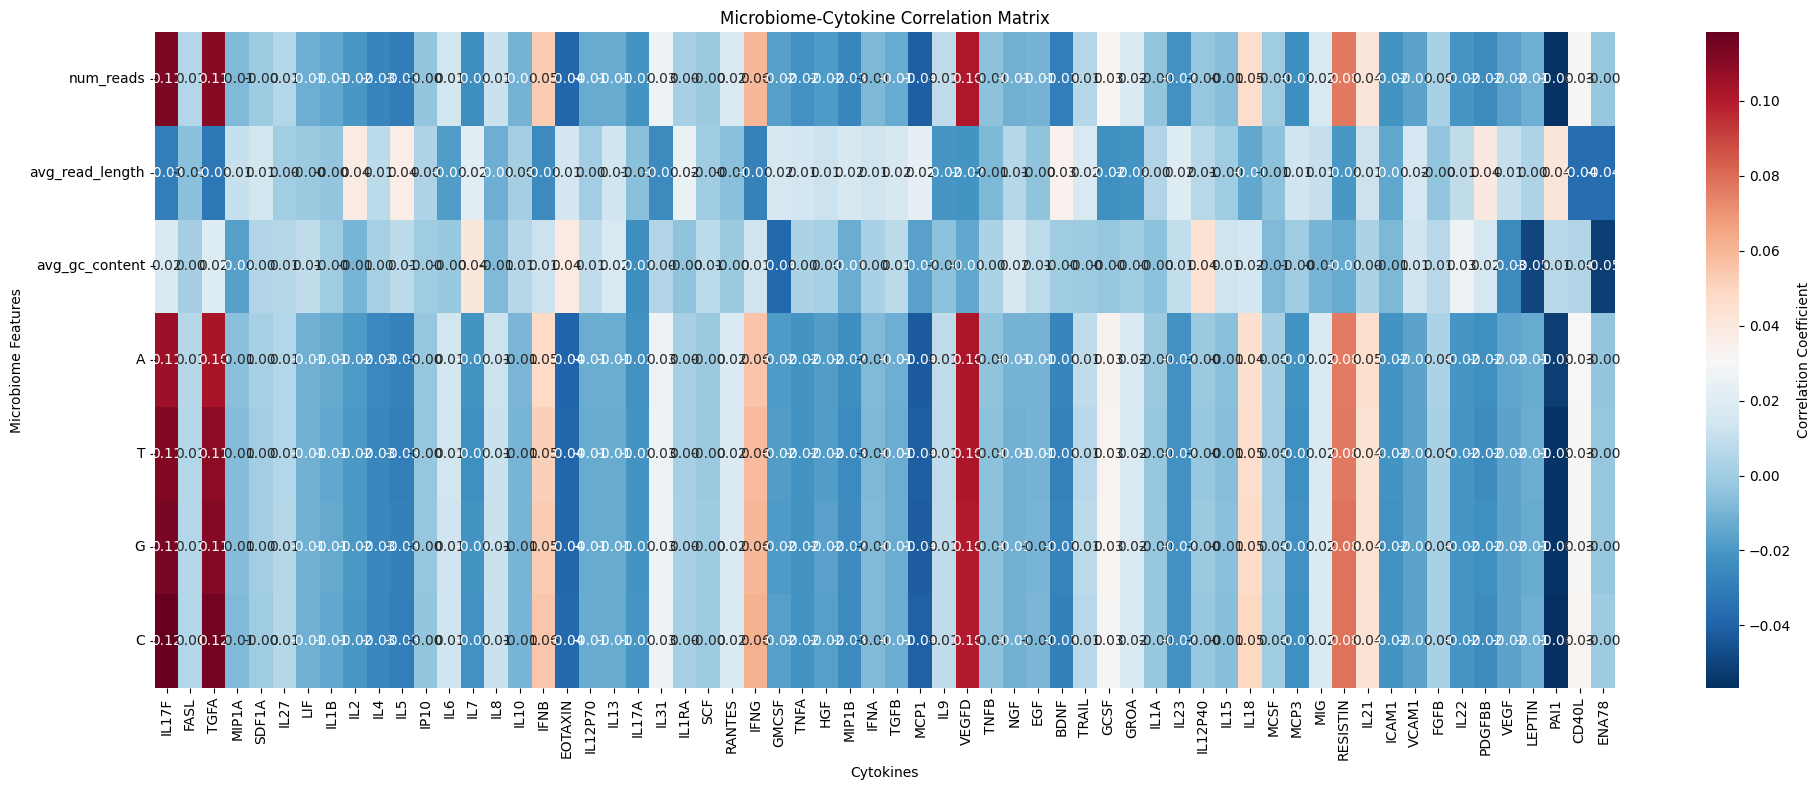

In [47]:
plt.figure(figsize=(20, 8))
sns.heatmap(microbe_cytokine_corr, annot=True, cmap='RdBu_r',
                fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Microbiome-Cytokine Correlation Matrix')
plt.xlabel('Cytokines')
plt.ylabel('Microbiome Features')
plt.tight_layout()
plt.show()

In [40]:
strong_correlations = []
for mb_feature in microbiome_cols:
    for cyto_feature in cytokine_cols:
        corr_val = microbe_cytokine_corr.loc[mb_feature, cyto_feature]
        if abs(corr_val) > 0.3:  # Threshold for "strong" correlation
            strong_correlations.append({
                    'microbiome_feature': mb_feature,
                    'cytokine_feature': cyto_feature,
                    'correlate': corr_val
                })

strong_corr_df = pd.DataFrame(strong_correlations).sort_values(by='correlate', key=abs, ascending=False)
print("Strongest Microbiome-Cytokine Correlations (|r| > 0.3):")
print(strong_corr_df.head(10))

KeyError: 'correlate'

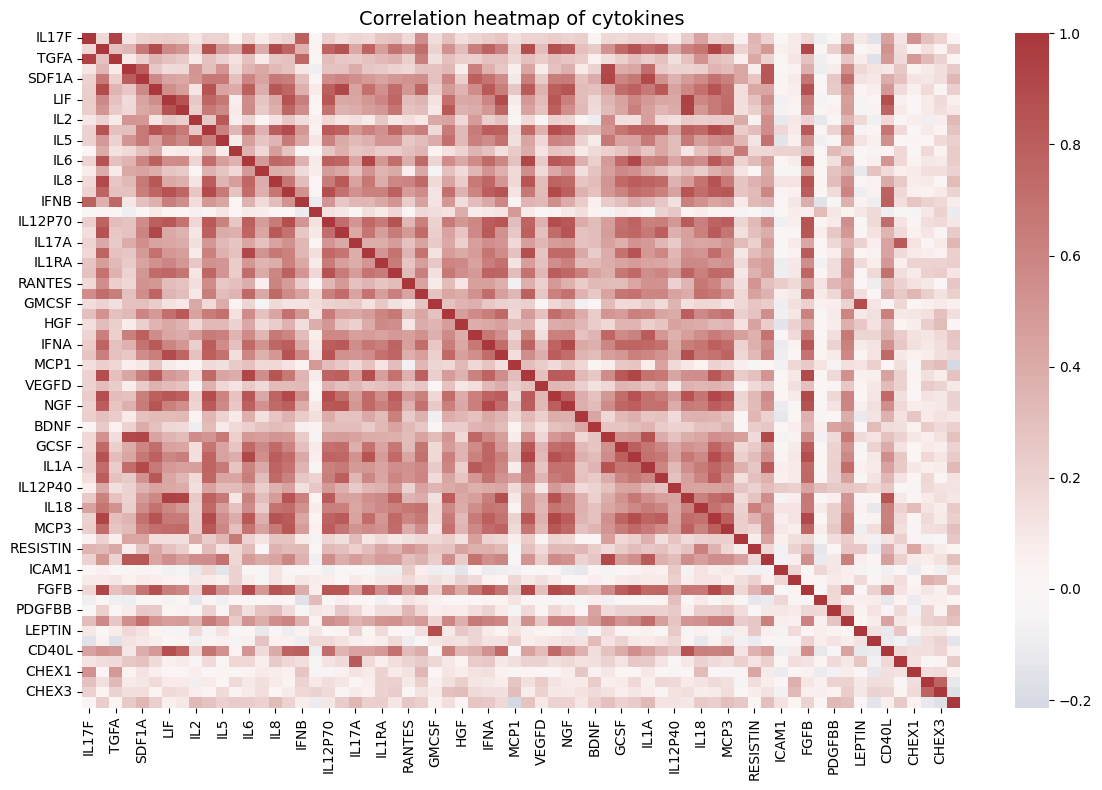

In [ ]:
def plot_cytokine_profile_data():
  """sample_id = cytokine_profile_df['SampleID'].unique()
  cytokine_cols = list(cytokine_profile_df.columns)[1:]
  print(cytokine_cols)
  plate = cytokine_profile_df['Plate']
  print(plate.unique())"""
  cytokine_cols = cytokine_profile_df.columns[2:68]
  plt.figure(figsize=(12, 8))
  sns.heatmap(cytokine_profile_df[cytokine_cols].corr(), cmap="vlag", center=0)
  plt.title("Correlation heatmap of cytokines", fontsize=14)
  plt.tight_layout()
  plt.show()

plot_cytokine_profile_data()

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


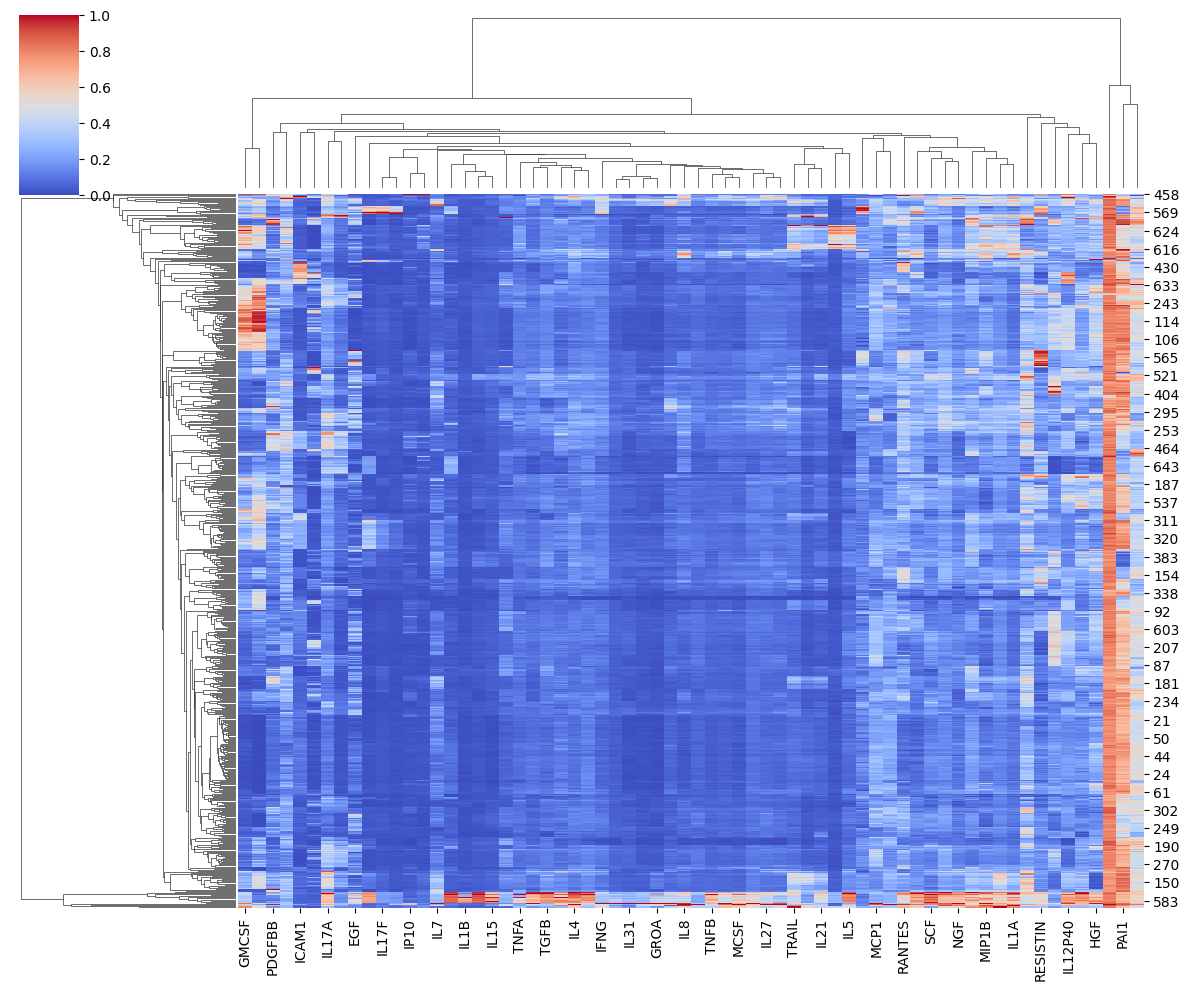

In [ ]:
cytokine_cols = cytokine_profile_df.columns[2:68]
sns.clustermap(cytokine_profile_df[cytokine_cols], cmap="coolwarm", standard_scale=1,
               row_cluster=True, col_cluster=True, figsize=(12, 10))
plt.show()

In [ ]:
print(f"train profile shape: {train_df.shape}")
train_df.head()

train profile shape: (2901, 4)


,filename,SampleType,SubjectID,SampleID
0,ID_LETPJN.mgb,Stool,Subject_BCUNIB,Sample_AFTIWE
1,ID_NTDGIW.mgb,Stool,Subject_UDAXIH,Sample_JQJVNK
2,ID_ZISBMF.mgb,Nasal,Subject_VRKADI,Sample_YJWGWW
3,ID_MDCVXU.mgb,Nasal,Subject_HIFZWD,Sample_VKEHZP
4,ID_SWAMNY.mgb,Stool,Subject_VGLNCV,Sample_NTDTEQ


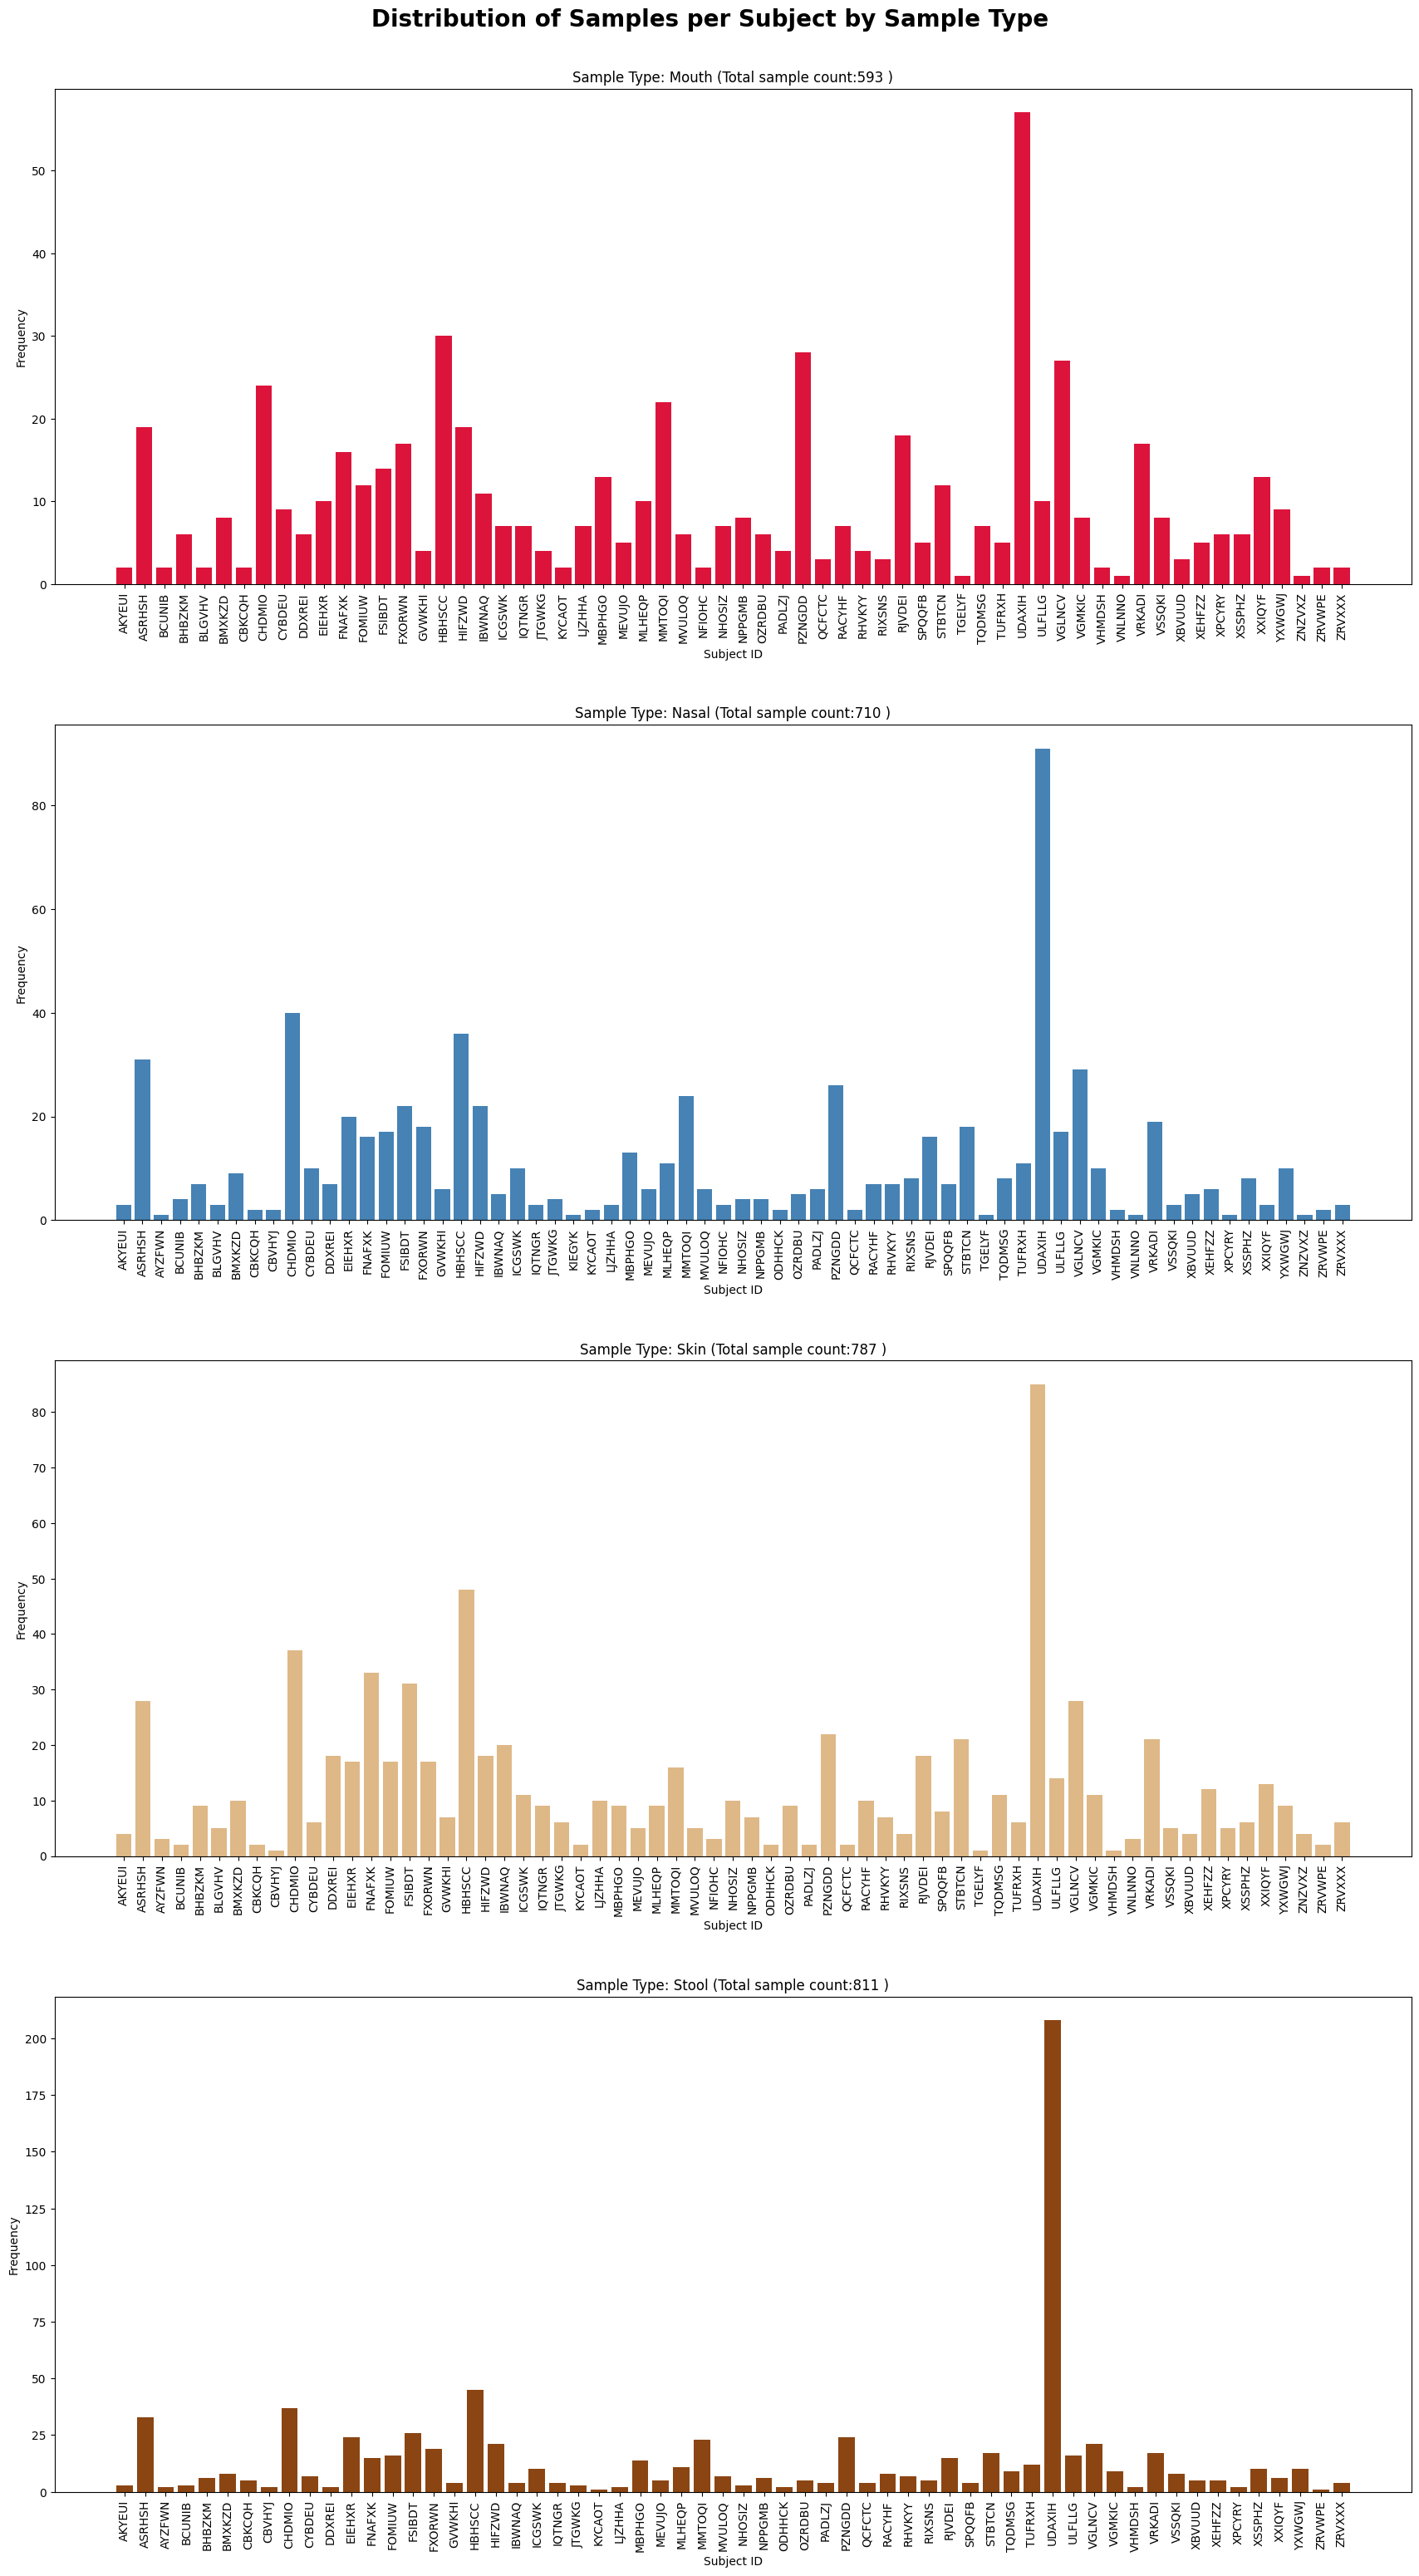

In [ ]:
sample_counts = train_df.groupby(['SampleType', 'SubjectID']).size().reset_index(name='SampleCount')
sample_counts

def plot_subjects_data():
  colors = {
        'Stool': '#8B4513',
        'Nasal': '#4682B4',
        'Skin': '#DEB887',
        'Mouth': '#DC143C'
  }
  sample_types = sorted(train_df['SampleType'].unique())
  n_types = len(sample_types)
  cols = 1
  rows = (n_types) // cols
  fig, axes = plt.subplots(rows, cols, figsize=(18, 8 * rows))
  fig.suptitle('Distribution of Samples per Subject by Sample Type',
                fontsize=20, fontweight='semibold')
  axes = axes.flatten()
  sample_counts = train_df.groupby(['SampleType', 'SubjectID']).size().reset_index(name='SampleCount')


  for i, sample_type in enumerate(sample_types):
    ax = axes[i]

    subject_ids = train_df[train_df['SampleType'] == sample_type]['SubjectID'].unique()
    type_data = sample_counts[sample_counts['SampleType'] == sample_type]['SampleCount']
    subject = sample_counts[sample_counts['SampleType'] == sample_type]['SubjectID']
    subject = [s.replace("Subject_", "") for s in subject]

    ax.bar(subject, type_data, color=colors[sample_type])
    ax.tick_params(axis='x', rotation=90, )
    #ax.plot(type_data,  color=colors[sample_type])
    ax.set_title(f'Sample Type: {sample_type} (Total sample count:{type_data.sum()} )' )
    ax.set_xlabel('Subject ID')
    ax.set_ylabel('Frequency')
    fig.tight_layout(pad=4.0)





plot_subjects_data()

In [ ]:
print(f"train subjects shape: {train_subjects_df.shape}")
train_subjects_df.head()

train subjects shape: (66, 17)


,SubjectID,FPG_Mean,FPG_class,IRIS,SSPG,FPG,SSPG.Date,Class,Gender,Ethnicity,Adj.age,BMI,OGTT,OGTT_Class,Longitudinal.HbA1C.Group,A1C_Class,Family
0,Subject_UDAXIH,1.274432,Diabetes,IS,91.5,131.75,8/7/14,Diabetic,M,C,59.48,21.47,2.245,Diabetes,6. Variable Diabetic-PreDM (n = 8),6.VDP,NaN
1,Subject_NHOSIZ,0.915833,Normal,Unknown,NaN,NaN,NaN,Prediabetic,M,C,61.17,27.06,1.005,Normal,3. PreDM-to-Normal (n = 10),3.PN,NaN
2,Subject_AYZFWN,0.952000,Normal,Unknown,NaN,NaN,NaN,Prediabetic,F,A,56.22,30.61,NaN,NaN,1. Normal (n = 51),1.Normal,NaN
3,Subject_KIEGYK,1.160000,Prediabetes,Unknown,NaN,NaN,NaN,Prediabetic,M,C,49.18,23.22,NaN,NaN,1. Normal (n = 51),1.Normal,NaN
4,Subject_CBVHYJ,0.880000,Normal,Unknown,NaN,NaN,NaN,Control,F,C,46.04,25.26,0.930,Normal,1. Normal (n = 51),1.Normal,NaN


In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [ ]:
sample_types = sorted(train_df['SampleType'].unique())
sample_types

['Mouth', 'Nasal', 'Skin', 'Stool']

In [ ]:
print(f"mpeg train shape: {mpeg_train_df.shape}")
mpeg_train_df.head()

mpeg train shape: (2901, 8)


,file,num_reads,avg_read_length,avg_gc_content,A,T,G,C
0,ID_VWRDDZ.fastq,12662,400.0,0.539149,1364681,969439,1603589,1127091
1,ID_QAOYCC.fastq,283648,124.5,0.520730,7304655,9620387,8886151,9502983
2,ID_XSCLCK.fastq,6096,400.0,0.538157,646309,479848,765262,546981
3,ID_DLVVCV.fastq,2070,124.5,0.545758,48535,68530,67940,72710
4,ID_KFDHBW.fastq,20135,400.0,0.556300,1969891,1603665,2724709,1755735


In [ ]:
unique_sample = cytokine_profile_df['SampleID'].isin(train_df['SampleID']).all()

In [ ]:
unique_sample

np.True_

In [ ]:
#merged_df = pd.merge(df1, df2, on='base_id', how='inner')